# Capstone Challenge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
from skimage import color, filters, measure, morphology


In [3]:
def create_mask(image, sigma = 1.0, thresh=0.5):
    gray_image = color.rgb2gray(image)
    blurred_image = filters.gaussian(gray_image, sigma)
    binary_mask = blurred_image < thresh
    
    return binary_mask

def connected_components(
    image,
    sigma = 1.0,
    thresh = 0.5,
    neighborhood = 2,
    min_area = 0
):

    mask = create_mask(image, sigma, thresh)
    mask = morphology.remove_small_objects(mask, min_area)
    
    labeled_image, n_objects = measure.label(mask, connectivity=neighborhood, return_num=True)
    
    return labeled_image, n_objects

11


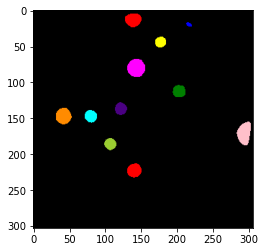

In [7]:
data_dir = '/home/dbodor/git/image-processing/data/'
file = data_dir + 'colonies-01.tif'
image = iio.imread(file)

# plt.imshow(image)


labeled_im, count = connected_components(image, 2, 0.3)
colored_label_im = color.label2rgb(labeled_im, bg_label=0)
print(count)
plt.imshow(colored_label_im)